# Versuch 223: Brownsche Bewegung


## Teil1: Pfad des Partikels

In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from helper import *
%matplotlib inline

file = np.genfromtxt("data/Messung - Schlotthauer Nisble.dat").T
t,x,y = file[1],file[2],file[3]
tlist = t

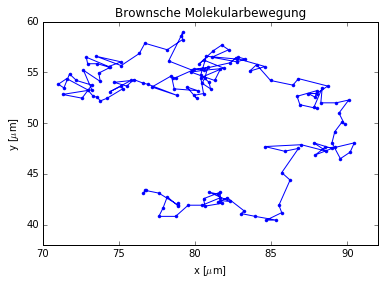

In [2]:
plt.errorbar(x,y,marker=".")
plt.xlabel("x [$\mu$m]")
plt.ylabel("y [$\mu$m]")
plt.xlim((70,92))
plt.ylim((38,60))
plt.title("Brownsche Molekularbewegung")
plt.savefig("Pfad - Schlotthauer Nisble",format="pdf")
plt.show()

## Teil2: $<r^2>$

In [3]:
dt=np.array([])
dx=np.array([])
dy=np.array([])

for i in range(len(t)-1): 
    dt=np.append( dt,t[i+1]-t[i])
    dx=np.append( dx,x[i+1]-x[i])
    dy=np.append( dy,y[i+1]-y[i])

In [4]:
r_squared=dx**2+dy**2

In [5]:
r_squared_mean=np.mean(r_squared)
r_squared_mean_std=np.std(r_squared)/np.sqrt(len(r_squared))

printResult("R_sq",r_squared_mean,r_squared_mean_std,"mum^2")

R_sq: ( 1.5507406174496645 +/- 0.11661066243705812 ) mum^2


In [6]:
from pandas import DataFrame as df
index = np.array([dt,dx,dy,dx**2,dy**2,r_squared])

indexsize = index.T[0].size

mean = [np.mean(index[i]) for i in range(indexsize)]
std = [np.std(index[i]) for i in range(indexsize)]
stdmean = std/np.sqrt(indexsize)
mini = [np.min(index[i]) for i in range(indexsize)] 
maxi = [np.max(index[i]) for i in range(indexsize)] 

df(np.array((mean,std,stdmean,mini,maxi)).T,
   index=["$\Delta t$ [s]","$\Delta x$ [$\mu m$]","$\Delta y$ [$\mu m$]",
          "$\Delta x^2$ [$\mu m^2$]","$\Delta y^2$ [$\mu m^2$]","$r^2$"],
   columns=["Mw","StdAbw","StdAbw Mw","Min","Max"])

,Mw,StdAbw,StdAbw Mw,Min,Max
$\Delta t$ [s],1.003208,0.016127,0.006584,1.000000,1.101000
$\Delta x$ [$\mu m$],-0.011805,0.931815,0.380412,-2.385000,1.927000
$\Delta y$ [$\mu m$],-0.074034,0.822704,0.335868,-2.477000,2.477000
$\Delta x^2$ [$\mu m^2$],0.868418,1.027681,0.419549,0.000000,5.688225
$\Delta y^2$ [$\mu m^2$],0.682323,1.029324,0.420220,0.000000,6.135529
$r^2$,1.550741,1.423415,0.581107,0.032789,6.900426


## Teil3: Boltzmann- und Diffusionskonstante

In [7]:
stdmean = lambda err,n: err/np.sqrt(n)
def relerr(dlist,alist):
    return np.sqrt(np.sum((np.array(dlist)/np.array(alist))**2))

In [8]:
eta, deta = 9.35*10**(-4),.05*10**(-4)
a, da = 378*10**-9, 15*10**-9
T, dT = 273.3 + 23, .1
t, ddt = np.mean(dt),stdmean(np.std(dt),dt.size)
rmean,drmean = r_squared_mean*10**-12,r_squared_mean_std*10**-12

k = 6 * np.pi * eta * a * rmean / ( 4 * T * t )
dk = k * relerr((deta,da,dT,ddt,drmean),(eta,a,T,t,rmean))
printResult("k_b",k,dk,"J/K")

k_b: ( 8.688824858489158e-24 +/- 7.4032158104336495e-25 ) J/K


In [9]:
k_lit = 1.38*10**-23
print("n/sig =",abs(k-k_lit)/dk)

n/sig = 6.90399317322


In [10]:
D = rmean / 4 / t
dD = relerr((drmean,ddt),(rmean,t))*D

printResult("D",D,dD,"m^2/s")

D: ( 3.864454167168412e-13 +/- 2.9063897631165764e-14 ) m^2/s


## Teil4: Histogramm

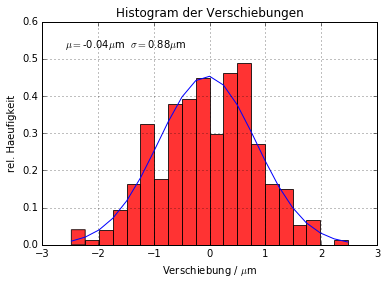

In [11]:
n, bins, patches=plt.hist(np.append(dx,dy), 20, normed=1, facecolor='red', alpha=0.8) 

mu = round(np.mean(np.append(dx,dy)),2)
sig = round(np.std(np.append(dx,dy)),2)

plt.text(-2.6, .53, '$\mu=$'+str(mu)
         +'$\mu$m'+'  $\sigma=$'+str(sig)+'$\mu$m')
plt.xlabel('Verschiebung / $\mu$m')
plt.ylabel('rel. Haeufigkeit')
plt.title('Histogram der Verschiebungen')
plt.grid(True)
plt.axis([-3, 3, 0, 0.6])

gauss = mlab.normpdf( bins, np.mean(np.append(dx,dy)), np.std(np.append(dx,dy)))
plt.plot(bins, gauss, 'b-', linewidth=1,)
plt.show()

## Teil5: k und D aus StdAbw

In [12]:
D = sig**2/2/t/10**12
dsig = .2*10**-6 / np.sqrt(2*299)

dD = relerr((ddt,2*dsig),(t,sig))*D
printResult("D_2",D,dD,"m^2/s")

D_2: ( 3.8596181377861624e-13 +/- 5.082966001123822e-16 ) m^2/s


In [13]:
r_kumm=np.cumsum(r_squared)

fit_lin(tlist,r_kumm)

plt.plot(tlist[:-1], r_kumm, marker='.', linewidth=0)
plt.xlabel('Zeit / s')
plt.ylabel('Summe $r_i^2 /\mu m^2$')
plt.title('Kummulative Verschiebung')
plt.show()

NameError: name 'np' is not defined